In [1]:
import requests
from pathlib import Path
import pandas as pd
import json
#import geopandas as gpd
import matplotlib.pyplot as plt


# Download Asylum Descision Dataset from UNHRC

We request 15 years of data from 2008-2023

In [2]:
# UNHCR base url for asylum seeker decisions of countries

base_url = "https://api.unhcr.org/population/v1/asylum-decisions/"


In [3]:
query_params = {
    "limit": 1000000,
    "yearFrom": 2008,
    "yearTo": 2023,
    "coo_all":  'TRUE',
    "coa_all":  'TRUE',
}

response = requests.get(url=base_url, params=query_params)

In [4]:
data = response.json()['items']
dataset_2008_2023 = [
    {'year': d['year'],
    'coo_name': d['coo_name'],
    'coo_iso': d['coo_iso'],
    'coa_name': d['coa_name'],
    'coa_iso': d['coa_iso'],
    'dec_recognized': d['dec_recognized'],
    'dec_other': d['dec_other'],
    'dec_rejected': d['dec_rejected'],
    'dec_closed': d['dec_closed'],
    'dec_total': d['dec_total'],
    } for d in data]

In [5]:
df_asylum_decisions = pd.DataFrame(dataset_2008_2023)
df_asylum_decisions

,year,coo_name,coo_iso,coa_name,coa_iso,dec_recognized,dec_other,dec_rejected,dec_closed,dec_total
0,2008,Afghanistan,AFG,Australia,AUS,5,0,0,0,5
1,2008,Albania,ALB,Australia,AUS,5,0,5,0,10
2,2008,Egypt,EGY,Australia,AUS,10,0,17,0,27
3,2008,Bahrain,BHR,Australia,AUS,0,0,5,0,5
4,2008,Bangladesh,BGD,Australia,AUS,11,0,59,87,157
...,...,...,...,...,...,...,...,...,...,...
73291,2023,Iran (Islamic Rep. of),IRN,Indonesia,IDN,5,0,0,0,5
73292,2023,Sudan,SDN,Jordan,JOR,0,0,0,5,5
73293,2023,Yemen,YEM,Syrian Arab Rep.,SYR,5,0,0,0,5
73294,2023,Pakistan,PAK,Thailand,THA,0,0,0,5,5


In [6]:
# Save data to json format
data_path = Path.cwd() / "data" / "asylum_decisions_2008-2023.json"
df_asylum_decisions.to_json(data_path, orient='records', indent=4)


# View Country Border GeoJSON Dataset

Downloaded from [https://github.com/datasets/geo-countries](https://github.com/datasets/geo-countries) which is a GeoJSON converted dataset sourced from [Natural Earth](https://www.naturalearthdata.com/).

In [7]:
country_file = data_path = Path.cwd() / "data" / "countries.geojson"
countries = gpd.read_file(country_file)


NameError: name 'gpd' is not defined

In [8]:
countries

NameError: name 'countries' is not defined

In [9]:
countries.plot()

NameError: name 'countries' is not defined

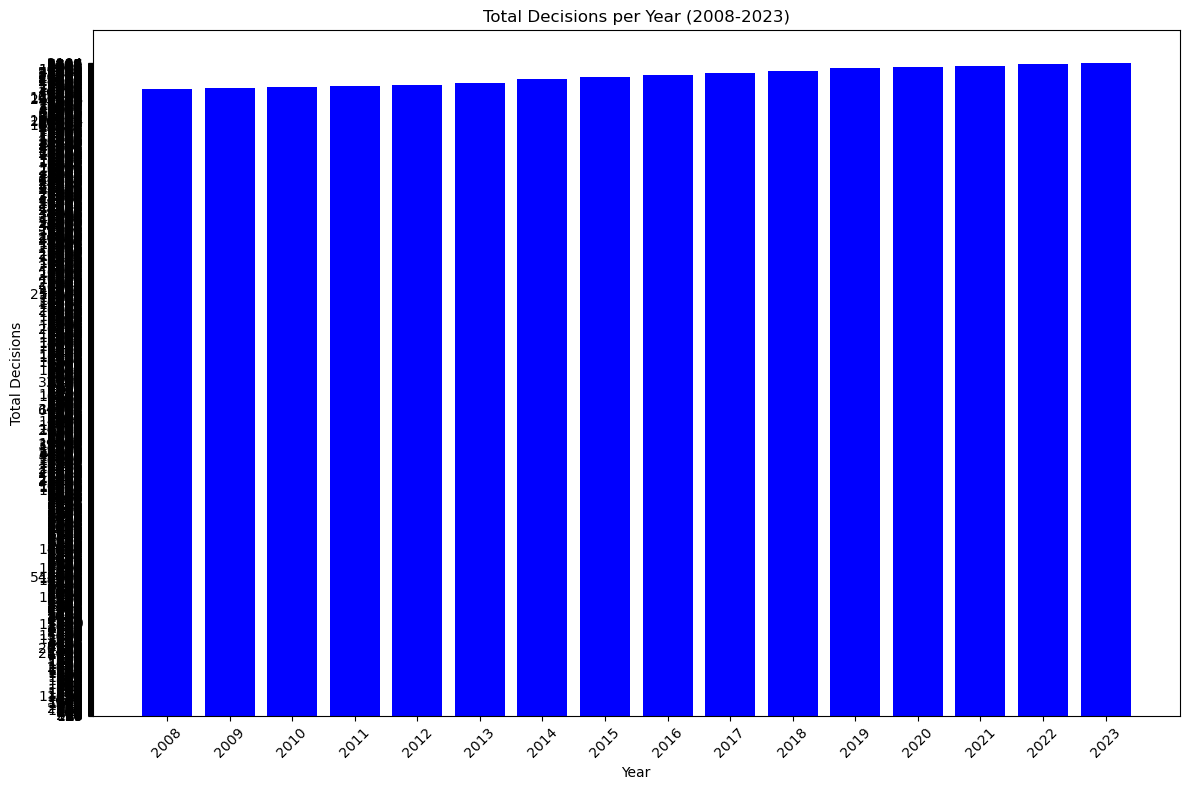

In [14]:
# Convert dec_totals to strings
dec_totals_str = [str(total) for total in dec_totals]

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(years, dec_totals_str, color='blue')
plt.xlabel('Year')
plt.ylabel('Total Decisions')
plt.title('Total Decisions per Year (2008-2023)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

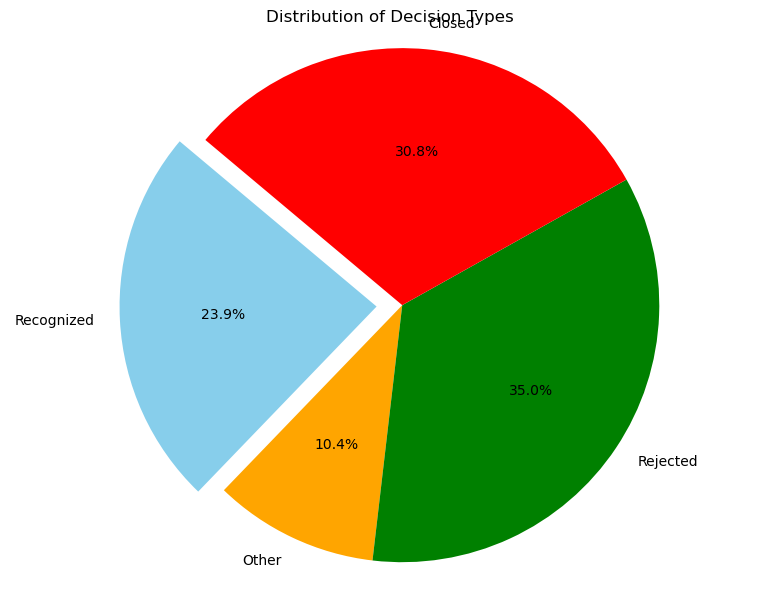

In [18]:
# Convert string values to integers
dec_recognized_int = [int(val) for val in dec_recognized]
dec_other_int = [int(val) for val in dec_other]
dec_rejected_int = [int(val) for val in dec_rejected]
dec_closed_int = [int(val) for val in dec_closed]

# Aggregate total counts of each decision type
total_recognized = sum(dec_recognized_int)
total_other = sum(dec_other_int)
total_rejected = sum(dec_rejected_int)
total_closed = sum(dec_closed_int)

# Labels for the pie chart
labels = ['Recognized', 'Other', 'Rejected', 'Closed']

# Data for the pie chart
sizes = [total_recognized, total_other, total_rejected, total_closed]

# Colors for each section
colors = ['skyblue', 'orange', 'green', 'red']

# Explode a slice if required
explode = (0.1, 0, 0, 0)  

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Decision Types')
plt.tight_layout()
plt.show()

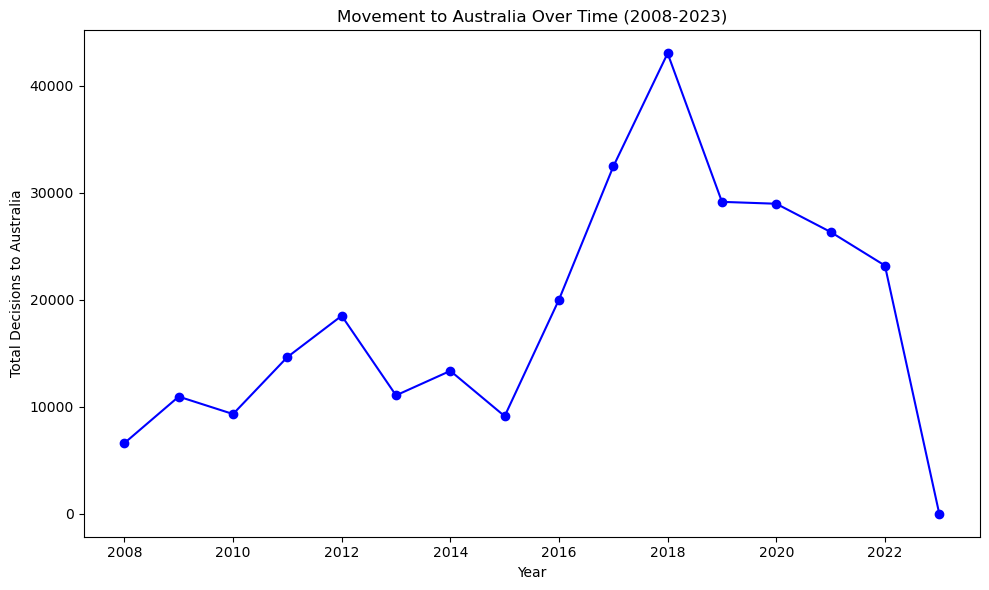

In [21]:
# Create a dictionary to store total decisions to Australia for each year
dec_totals_to_aus_dict = {year: 0 for year in range(2008, 2024)}

# Aggregate total decisions to Australia for each year
for entry in dataset_2008_2023:
    if entry['coa_iso'] == 'AUS':
        dec_totals_to_aus_dict[entry['year']] += entry['dec_total']

# Extract years and total decisions to Australia
years = list(dec_totals_to_aus_dict.keys())
dec_totals_to_aus = list(dec_totals_to_aus_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(years, dec_totals_to_aus, marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Decisions to Australia')
plt.title('Movement to Australia Over Time (2008-2023)')
plt.tight_layout()
plt.show()

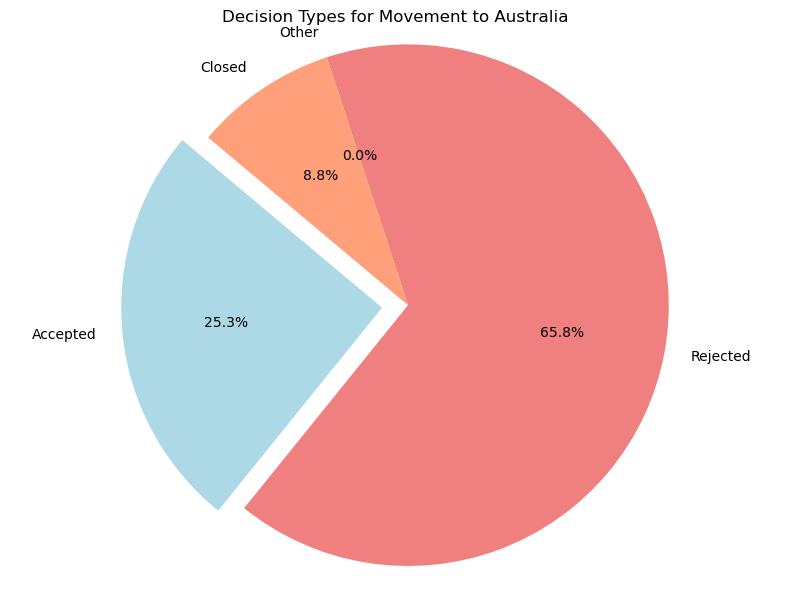

In [23]:
# Filter dataset for movement to Australia
dataset_to_aus = [entry for entry in dataset_2008_2023 if entry['coa_iso'] == 'AUS']

# Initialize counts for each decision type
accepted_count = 0
rejected_count = 0
other_count = 0
closed_count = 0

# Aggregate counts for each decision type
for entry in dataset_to_aus:
    accepted_count += int(entry['dec_recognized'])
    rejected_count += int(entry['dec_rejected'])
    other_count += int(entry['dec_other'])
    closed_count += int(entry['dec_closed'])

# Data for the pie chart
decision_types = ['Accepted', 'Rejected', 'Other', 'Closed']
counts = [accepted_count, rejected_count, other_count, closed_count]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']
explode = (0.1, 0, 0, 0)  # Explode the first slice (Accepted)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=decision_types, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Decision Types for Movement to Australia')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()